In [1]:
import quantstats as qs
import yfinance as yf
import ccxt as ccxt
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.ticker import (
    FormatStrFormatter as _FormatStrFormatter,
    FuncFormatter as _FuncFormatter
)

#my imports
import sys
sys.path.insert(1, '../scripts')
import utils as utl
import html_evaluation_portfolio as hep
import volatility_estimator as ve

# Comparing portfolios' return compute through different volatility estimator 

In [8]:
list_securities =  ['SPY', 'TLT', 'GLD'] 
window = 30
start_date = pd.to_datetime('2007-01-03') 
end_date = pd.to_datetime(start_date) + pd.DateOffset(days=1814)
title = 'Comparasion of all weather during 2007-2012 period'
save_name = 'SPY_TLT_GLD_estimator_comparasion'

In [5]:
dictionary = {}
data = hep.create_dataframe(list_securities) #I can import this dataframe but it is preatty fast.

for i in list_securities:
    df_strd_dev = ve.dataframe_strd_dev(data, window)
    df_strd_dev = ve.index_df(df_strd_dev, data, window)
    data_perc = hep.perc_df(data)
    inv_volat_data = hep.df_inverse_volatility(data_perc, window)
    df_weighted = hep.df_wheighted(inv_volat_data)
    data_r = data.div(data.shift(1))-1
    data_earnings = hep.df_earnings(df_weighted, data_r)
    data_earnings.dropna(inplace = True)
    
    data_earnings = data_earnings[start_date: end_date]
    
    dictionary['stdv'] = data_earnings
for i in list_securities:
    data_h_l = ve.create_dataframe_high_low(list_securities)   
    #data_h_l = data_h_l[1135: 1135 + 1834]
    data_h_l = data_h_l.loc[start_date: end_date]
    df_volat = ve.compute_park_volatility(data_h_l, list_securities, window)
    data.dropna(inplace = True)
    #data = data[1135: 1135 + 1834]
    data = data[start_date: end_date]
    df_volat = ve.index_df(df_volat, data, window)
    df_weighted = hep.df_wheighted(df_volat)
    data_r = data.div(data.shift(1))-1
    data_earnings = hep.df_earnings(df_weighted, data_r)
    data_earnings.dropna(inplace = True)
    
    data_earnings = data_earnings[start_date: end_date]
    
    dictionary['park'] = data_earnings

for i in list_securities:
    data_ohlc = ve.create_dataframe_ohlc(list_securities)
    #data_holc = data_holc[1135: 1135 + 1834]
    data_ohlc = data_ohlc[start_date: end_date]
    df_satchell_volat = ve.compute_satchell_volatility(data_ohlc, list_securities, window)
    data.dropna(inplace = True)
    #data = data[1135: 1135 + 1834]
    data = data[start_date: end_date]
    df_satchell_volat = ve.index_df(df_satchell_volat, data, window)
    df_weighted = hep.df_wheighted(df_satchell_volat)
    
    data_r = data.div(data.shift(1))-1
    data_earnings = hep.df_earnings(df_weighted, data_r)
    data_earnings.dropna(inplace = True)
    
    data_earnings = data_earnings[start_date: end_date]
    
    dictionary['satch'] = data_earnings

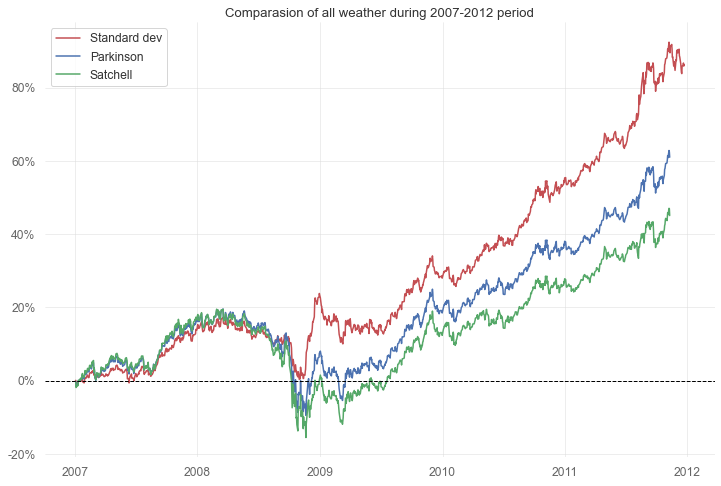

In [10]:
from quantstats.stats import compsum
from quantstats._plotting.core import format_pct_axis

#returns = dict_df['x1 leverage']['Tot']
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title(title)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(compsum(dictionary['stdv']['Tot']), lw=1.5, label='Standard dev', color='r', alpha=1)
ax.plot(compsum(dictionary['park']['Tot']), lw=1.5, label='Parkinson', color='b', alpha=1)
ax.plot(compsum(dictionary['satch']['Tot']), lw=1.5, label='Satchell', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()

plt.savefig('../img/'+ save_name + 'png')